# 피해규모만가지고 지역 분류

In [1]:
fire_damage = pd.read_csv('data/화재피해_201421(성동구제외).csv')
fire_damage

,행정구역,시점,소실면적 (㎡),피해액,사망,부상,이재민수,구조인원
0,종로구,2014,1697,1395325,0,1,2,17
1,종로구,2015,1462,566923,4,5,3,5
2,종로구,2016,499,394813,2,10,0,4
3,종로구,2017,832,1077665,1,3,20,16
4,종로구,2018,909,574300,14,22,44,60
...,...,...,...,...,...,...,...,...
179,강북구,2017,652,339146,0,6,0,8
180,강북구,2018,211,216838,4,2,3,11
181,강북구,2019,693,217805,1,9,0,17
182,강북구,2020,398,208380,1,5,2,28


In [2]:
q1=fire_damage.피해액.quantile(0.25)
q2=fire_damage.피해액.quantile(0.5)
q3=fire_damage.피해액.quantile(0.75)
iqr=q3-q1
iqr

503598.75

In [3]:
# condition=fire_damage['피해액']>q3+1.5*iqr
# fire_damage[condition]

In [4]:
fire_damage.행정구역.unique()

array(['종로구', '중구', '광진구', '용산구', '동대문구', '영등포구', '성북구', '은평구', '강남구',
       '서초구', '강서구', '강동구', '마포구', '도봉구', '구로구', '노원구', '관악구', '송파구',
       '양천구', '중랑구', '동작구', '서대문구', '강북구'], dtype=object)

In [5]:
fire_damage = fire_damage[fire_damage['행정구역'] != '중구']
fire_damage.행정구역.unique()

array(['종로구', '광진구', '용산구', '동대문구', '영등포구', '성북구', '은평구', '강남구', '서초구',
       '강서구', '강동구', '마포구', '도봉구', '구로구', '노원구', '관악구', '송파구', '양천구',
       '중랑구', '동작구', '서대문구', '강북구'], dtype=object)

In [6]:
fire_damage = fire_damage.rename(columns={'소실면적 (㎡)': '소실면적'})
fire_damage

,행정구역,시점,소실면적,피해액,사망,부상,이재민수,구조인원
0,종로구,2014,1697,1395325,0,1,2,17
1,종로구,2015,1462,566923,4,5,3,5
2,종로구,2016,499,394813,2,10,0,4
3,종로구,2017,832,1077665,1,3,20,16
4,종로구,2018,909,574300,14,22,44,60
...,...,...,...,...,...,...,...,...
179,강북구,2017,652,339146,0,6,0,8
180,강북구,2018,211,216838,4,2,3,11
181,강북구,2019,693,217805,1,9,0,17
182,강북구,2020,398,208380,1,5,2,28


# K-maens

In [7]:
local_fire_dg = fire_damage.drop(columns = ['시점']).groupby('행정구역').mean()
local_fire_dg = local_fire_dg.reset_index()
local_fire_dg

,행정구역,소실면적,피해액,사망,부상,이재민수,구조인원
0,강남구,2377.375,1748357.875,1.250,18.875,28.250,31.250
1,강동구,1387.125,442263.750,1.250,12.250,11.750,26.500
2,강북구,759.000,345758.375,2.125,7.625,0.750,10.000
3,강서구,1786.500,557507.250,2.250,18.250,13.875,21.750
4,관악구,2197.250,667565.625,2.375,15.125,23.500,39.875
5,광진구,1283.875,1014047.250,0.625,11.250,5.250,19.875
6,구로구,1758.750,975656.125,1.750,10.500,7.625,34.750
7,노원구,10000.000,444005.250,1.125,14.375,13.250,15.375
8,도봉구,1047.000,404981.125,1.750,7.250,13.375,15.625
9,동대문구,1362.625,1216545.625,2.875,13.125,25.875,37.375


In [8]:
# local_fire_dg['판별변수'] = 0.2*local_fire_dg.소실면적 + 0.3* local_fire_dg.피해액 + 0.3*(local_fire_dg.사망*0.7 + local_fire_dg.부상*0.3) + 0.2*local_fire_dg.이재민수

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('num_clurster')
    plt.ylabel('SSE')
    plt.show()

In [11]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [12]:
local_fire_dg_featrue = local_fire_dg.drop(columns = '행정구역')

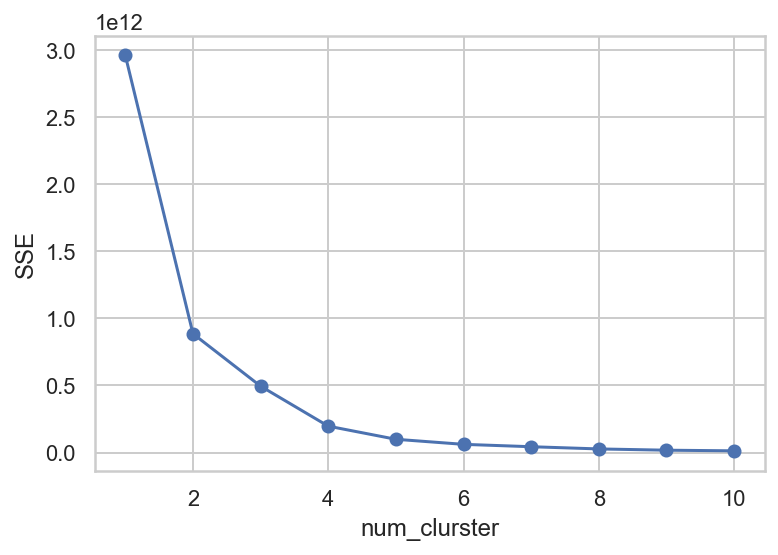

In [13]:
elbow(local_fire_dg_featrue)

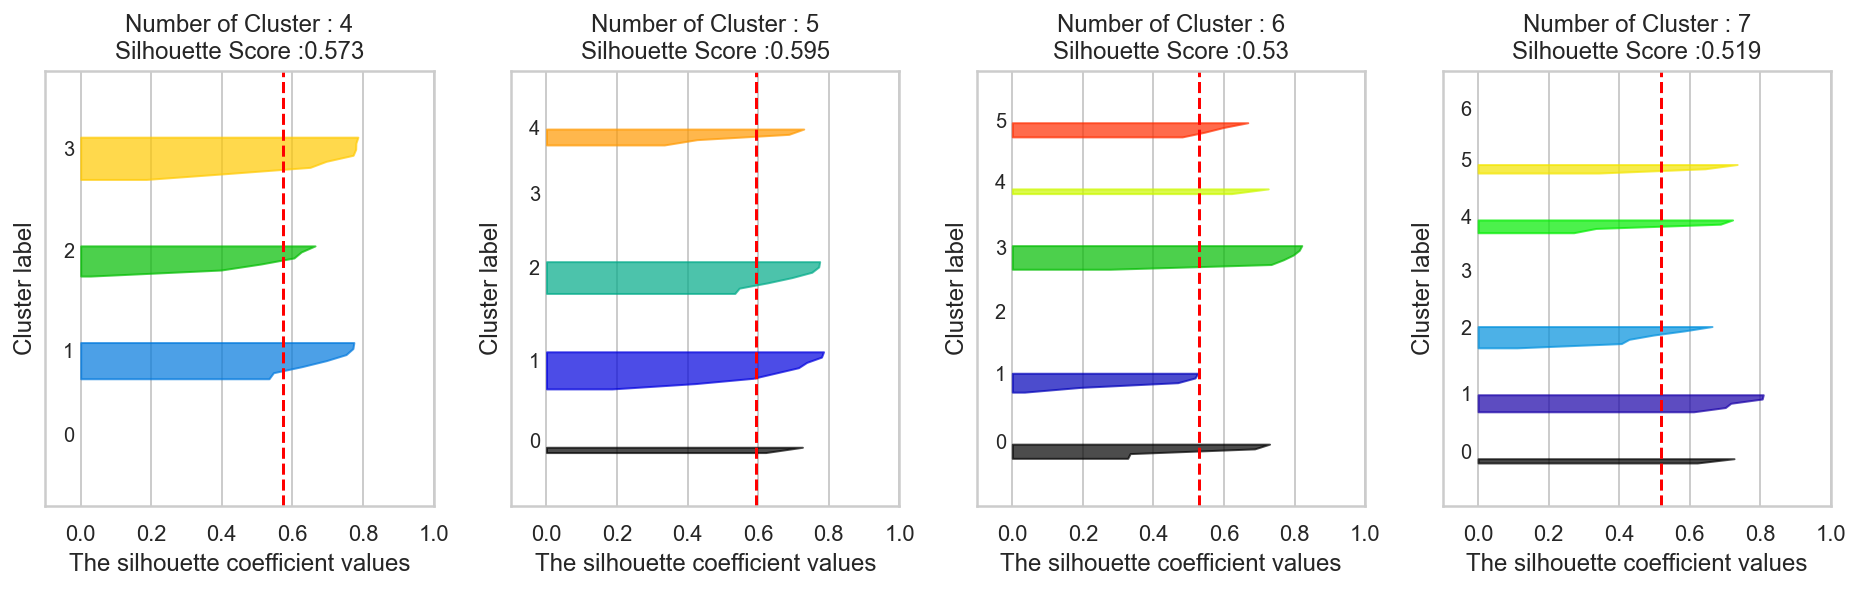

In [14]:
# cluster 개수를 3개, 4개, 5개, 6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([4, 5, 6, 7], local_fire_dg_featrue)

In [15]:
k = 5
# kmeans = KMeans(n_clusters=k)
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300,random_state=0).fit(local_fire_dg_featrue)
print(kmeans.labels_)

[3 2 2 1 1 4 4 2 2 0 2 1 0 4 1 1 1 4 2 1 1 2]


In [16]:
local_fire_dg['cluster'] = kmeans.labels_
# local_fire_dg.sort_values(by='피해액', ascending=False)
fire_dg_result = local_fire_dg.groupby(['행정구역','cluster'])['피해액'].count()
cluster_result = pd.DataFrame(fire_dg_result).sort_values(by='cluster', ascending=False).reset_index()
cluster_result

,행정구역,cluster,피해액
0,영등포구,4,1
1,서초구,4,1
2,광진구,4,1
3,구로구,4,1
4,강남구,3,1
5,동작구,2,1
6,용산구,2,1
7,강동구,2,1
8,중랑구,2,1
9,도봉구,2,1


In [17]:
# cluster_result[cluster_result['피해액'] > 50].reset_index(drop=True) # 70: 과반수개념)

In [18]:
level = ['A', 'B', 'C', 'D', 'E']
A = ['강남구']
B = ['동대문구', '서대문구']
C = ['영등포구', '서초구', '광진구', '구로구']
D = ['송파구', '양천구', '강서구', '관악구', '은평구', '종로구', '마포구', '성북구']
E = ['용산구', '동작구', '강동구', '중랑구', '도봉구', '노원구', '강북구']

## 데이터 년도별 병합
- 기존 월별 데이터셋 학습시 데이터가 월별의 영향을 많이 받고 있는것으로 판단

In [19]:
fire_total_df = pd.read_csv('data/train_total_df.csv')
fire_total_df.행정구역.nunique()

22

In [20]:
fire_total_df['집계년'] = fire_total_df['집계년월'].str[:4].astype('int64')
fire_total_df.columns

Index(['집계년월', '화재현황', '행정구역', '독거노인가구수', '등록장애인수', '인구밀도', '소방장비(차량)',
       '건물평균연령', '평균기온', '평균강수량', '평균습도', '평균풍속', '전기사용량(1000kwh)', '의용소방대원',
       '소방대상물', '주택수', '흡연자수', '단독주택가스', '교육의료가스', '판매가스', '기타가스', '가스합계',
       '피해액', 'level', '사망', '부상', '이재민수', '구조인원', 'totalPopul', 'oldAgePopul',
       '소실면적', '집계년'],
      dtype='object')

In [21]:
fire_total_df['target'] = np.nan

for i in fire_total_df['행정구역'].unique():
  if i == '강남구':
    fire_total_df[fire_total_df['행정구역'] == i] = fire_total_df[fire_total_df['행정구역'] == i].fillna('A')
  elif i in B:
    fire_total_df[fire_total_df['행정구역'] == i] = fire_total_df[fire_total_df['행정구역'] == i].fillna('B')
  elif i in C:
    fire_total_df[fire_total_df['행정구역'] == i] = fire_total_df[fire_total_df['행정구역'] == i].fillna('C')
  elif i in D:
    fire_total_df[fire_total_df['행정구역'] == i] = fire_total_df[fire_total_df['행정구역'] == i].fillna('D')
  else:
    fire_total_df[fire_total_df['행정구역'] == i] = fire_total_df[fire_total_df['행정구역'] == i].fillna('E')

In [22]:
fire_total_df = fire_total_df.drop(columns=['집계년월', 'level']).groupby(['집계년', '행정구역', 'target']).sum().reset_index()
# fire_total_df.to_csv('data/check_fire_total_df.csv', encoding='utf-8-sig')
fire_total_df

,집계년,행정구역,target,화재현황,독거노인가구수,등록장애인수,인구밀도,소방장비(차량),건물평균연령,평균기온,...,기타가스,가스합계,피해액,사망,부상,이재민수,구조인원,totalPopul,oldAgePopul,소실면적
0,2014,강남구,A,426,134988,193668,177240,552,248.751596,160.2,...,6063,292581,1.364100e+06,1.0,17.0,115.0,23.0,6922425,406245,4106.0
1,2014,강동구,E,239,126552,218712,234924,444,250.709422,160.2,...,14565,280138,5.841610e+05,1.0,15.0,31.0,19.0,5810301,360888,1662.0
2,2014,강북구,E,188,151056,208284,172092,384,311.623779,160.2,...,1977,102161,3.977210e+05,1.0,7.0,1.0,5.0,4076061,386226,805.0
3,2014,강서구,D,306,168876,335748,171384,468,247.310659,160.2,...,20106,189842,6.773270e+05,1.0,42.0,8.0,85.0,6994872,467838,1423.0
4,2014,관악구,D,260,171816,245976,215892,420,250.462785,160.2,...,1541,194850,6.315560e+05,2.0,14.0,6.0,16.0,6405711,456789,2861.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2021,영등포구,C,208,120432,173940,195972,504,393.269829,164.4,...,5930,168203,9.136980e+05,0.0,8.0,5.0,6.0,4824501,486534,2052.0
172,2021,용산구,E,176,76740,92232,130224,456,460.805333,164.4,...,4732,107436,2.967930e+05,0.0,5.0,56.0,5.0,2878758,319218,422.0
173,2021,은평구,D,160,168240,261072,192732,456,363.208222,164.4,...,28225,175545,8.757220e+05,3.0,8.0,32.0,32.0,5742450,691308,882.0
174,2021,종로구,D,192,58764,71148,77172,540,459.262081,164.4,...,1419,113925,4.654990e+05,0.0,12.0,3.0,3.0,1859340,227313,390.0


In [23]:
fire_total_df.의용소방대원 = fire_total_df.의용소방대원 /12

fire_total_df.의용소방대원

0      223.0
1      176.0
2      171.0
3      274.0
4      198.0
       ...  
171    220.0
172    200.0
173    180.0
174    220.0
175    180.0
Name: 의용소방대원, Length: 176, dtype: float64

In [24]:
fire_total_df.columns

Index(['집계년', '행정구역', 'target', '화재현황', '독거노인가구수', '등록장애인수', '인구밀도',
       '소방장비(차량)', '건물평균연령', '평균기온', '평균강수량', '평균습도', '평균풍속', '전기사용량(1000kwh)',
       '의용소방대원', '소방대상물', '주택수', '흡연자수', '단독주택가스', '교육의료가스', '판매가스', '기타가스',
       '가스합계', '피해액', '사망', '부상', '이재민수', '구조인원', 'totalPopul', 'oldAgePopul',
       '소실면적'],
      dtype='object')

In [25]:
fire_total_df.drop(columns = [ '집계년', '행정구역', 'target']).corr()['의용소방대원'].sort_values(ascending = False)

의용소방대원            1.000000
소방장비(차량)          0.572080
전기사용량(1000kwh)    0.348593
판매가스              0.281960
부상                0.261253
구조인원              0.234754
피해액               0.200268
소방대상물             0.199932
화재현황              0.169101
가스합계              0.160501
주택수               0.152772
totalPopul        0.099138
소실면적              0.092788
기타가스              0.085289
평균강수량             0.079435
교육의료가스            0.067335
평균습도              0.049428
이재민수              0.037651
사망                0.012131
건물평균연령            0.007717
등록장애인수           -0.008712
oldAgePopul      -0.012546
평균기온             -0.037511
평균풍속             -0.038935
인구밀도             -0.065399
독거노인가구수          -0.067255
흡연자수             -0.093165
단독주택가스           -0.175059
Name: 의용소방대원, dtype: float64

In [26]:
# plt.figure(figsize=(15,15))
# plt.rc('font', family='NanumGothic')
# sns.heatmap(data = fire_total_df.drop(columns = ['집계년', '행정구역', 'target']).corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [27]:
condition_A = fire_total_df[fire_total_df.target == 'A'].index
condition_F = fire_total_df[(fire_total_df.target == 'E') | (fire_total_df.target == 'D')].index

In [28]:
fire_total_df_feature = fire_total_df.drop(columns = ['화재현황','부상','구조인원','가스합계','집계년', '행정구역', 'target', '의용소방대원', '단독주택가스', '교육의료가스', '판매가스', '기타가스', '이재민수', '평균풍속', '건물평균연령','평균습도', '평균기온','평균강수량'])#, '단독주택가스', '흡연자수', '인구밀도', '독거노인가구수', '평균풍속', '평균기온', '건물평균연령', '등록장애인수', '평균습도', '교육의료가스'])
fire_total_df_target = fire_total_df.의용소방대원
fire_total_df_feature.columns

Index(['독거노인가구수', '등록장애인수', '인구밀도', '소방장비(차량)', '전기사용량(1000kwh)', '소방대상물',
       '주택수', '흡연자수', '피해액', '사망', 'totalPopul', 'oldAgePopul', '소실면적'],
      dtype='object')

In [29]:
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scaler = RobustScaler()
# fire_total_df_feature.iloc[:,:] = scaler.fit_transform(fire_total_df_feature)

In [30]:
X_train = fire_total_df_feature.iloc[condition_F]
y_train = fire_total_df_target.iloc[condition_F]


X_test = fire_total_df_feature.iloc[condition_A]
y_test = fire_total_df_target.iloc[condition_A]

In [31]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=20) # 20

In [32]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures

# index로 데이터를 구분해서 학습
models = []
scores = []
for i, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    
    train_feature = X_train.iloc[train_idx]
    val_data_feature = X_train.iloc[val_idx]
    
    train_label = y_train.iloc[train_idx]
    val_data_label = y_train.iloc[val_idx]
    
    # 모델 객체
    # model = AdaBoostRegressor(random_state=42, n_estimators=100, learning_rate=0.2) 
    # model = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=4, learning_rate=0.01)
    # model = AdaBoostRegressor(LogisticRegression(), n_estimators=100, random_state=13)
    # model = DecisionTreeRegressor(max_depth=4)
    model = LogisticRegression(max_iter=100, random_state=42)
    # model = KNeighborsRegressor()
    # model = SGDRegressor()
    # model = Lasso()
    model.fit(train_feature, train_label)
    models.append(model)
    
    val_score = model.score(val_data_feature, val_data_label)
    scores.append(val_score)
    print(i, np.round(val_score, 4))

print("*"*10)
print(np.round(np.mean(scores), 4))

0 0.6667
1 0.75
2 0.625
3 0.75
4 0.5833
**********
0.675


In [33]:
pred = model.predict(X_test)

In [34]:
pd.DataFrame([pred, y_test])

,0,1,2,3,4,5,6,7
0,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.0
1,223.0,200.0,186.0,200.0,220.0,220.0,220.0,240.0
